In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display
import scipy.stats as stats
import matplotlib.patches as mpatches

def stats_box(y):
    result = stats.describe(y)
    ax = plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    ex_labels = []
    ex_labels.append('$n=%d$' % (result.nobs))
    ex_labels.append('$\mu=%2.2f$' % (result.mean))
    ex_labels.append('$med=%2.2f$' % (np.median(y)))
    ex_labels.append('$\sigma=%2.2f$' % (np.sqrt(result.variance)))
    ex_labels.append('$\min=%2.2f$' % (result.minmax[0]))
    ex_labels.append('$\max=%2.2f$' % (result.minmax[1]))
    ex_handles = [mpatches.Patch(
        color='white', alpha=0.0, visible=False) for i in ex_labels]
    plt.legend(handles=handles + ex_handles, labels=labels + ex_labels,
               loc='best', frameon=False)

    return


In [ ]:


n_epochs = 50

epochs = list(range(1,n_epochs+1))
mins = np.zeros([n_epochs])
maxs = np.zeros([n_epochs])
stds = np.zeros([n_epochs])
means = np.zeros([n_epochs])

for ie in range(0,n_epochs):
    data = pd.read_csv(str(ie)+'_verified_mols.csv')
    #data['mol'] = data['smiles'].apply(Chem.MolFromSmiles)
    #data['mol'] = data['mol'].apply(Chem.AddHs)

    y = data['det. V (km/s)']
    
    mins[ie] = min(y)
    maxs[ie] = max(y)
    stds[ie] = np.std(y)
    means[ie] = np.mean(y)
    
    #sns.distplot(y)
    #stats_box(y)
    #sns.despine(offset=True)
    #plt.show()

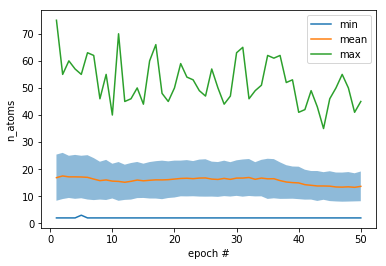

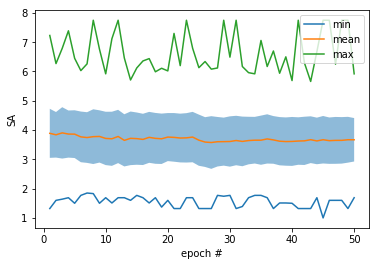

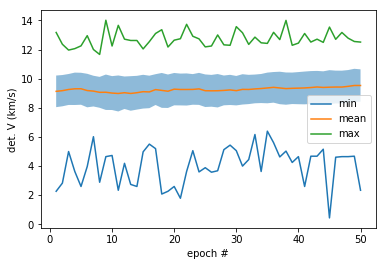

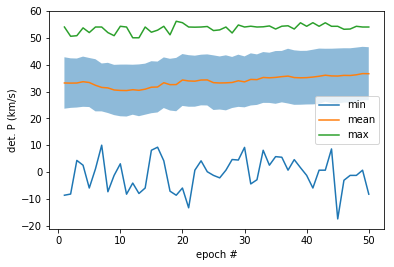

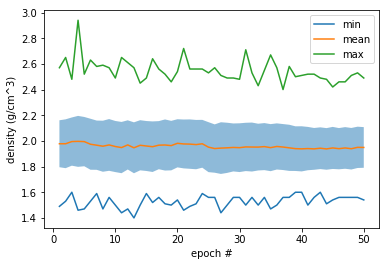

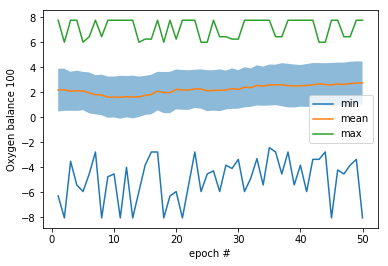

In [22]:
import matplotlib.pyplot as plt
from rdkit import Chem


n_epochs = 50

properties = ['n_atoms', 'SA', 'det. V (km/s)', 'det. P (km/s)', 'density (g/cm^3)', 'Oxygen balance 100']
#dir_path = 'energetics_test4_det_vel/'
dir_path = ''

def num_caps_in_SMILES(s):
    caps = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    return len( list(filter(lambda x: x in caps, s) ))

def count_natoms_in_smiles(s):
    try:
        natoms = Chem.MolFromSmiles(s).GetNumAtoms() #added by D.C. Elton, checks valence bonding is correct
    except:
        print("ERROR for ", s)
        natoms = 0
    return natoms

for prop in properties:
    epochs = list(range(1,n_epochs+1))
    mins = np.zeros([n_epochs])
    maxs = np.zeros([n_epochs])
    stds = np.zeros([n_epochs])
    means = np.zeros([n_epochs])

    for ie in range(0,n_epochs):
        data = pd.read_csv(dir_path+str(ie)+'_verified_mols.csv')

        if (prop == 'n_atoms'):
            data['n_atoms'] = data['smiles'].apply(count_natoms_in_smiles)
   
        y = data[prop]

        mins[ie] = min(y)
        maxs[ie] = max(y)
        stds[ie] = np.std(y)
        means[ie] = np.mean(y)

    plt.plot(epochs, mins, label='min')
    plt.plot(epochs, means, label='mean' )
    plt.plot(epochs, maxs, label='max')
    ax = plt.gca()
    ax.fill_between(epochs, means+stds , means-stds, alpha = 0.5 )
    plt.legend()
    plt.ylabel(prop)
    plt.xlabel('epoch #')

    plt.show()
   


    


In [17]:

caps = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
str(filter(lambda x: x in caps, 'asdfsaSDF'))


'<filter object at 0x7f2f2f1e3cc0>'

In [10]:
data['Mols'] = data['smiles'].apply(Chem.MolFromSmiles())


ArgumentError: Python argument types in
    rdkit.Chem.rdmolfiles.MolFromSmiles()
did not match C++ signature:
    MolFromSmiles(boost::python::api::object SMILES, bool sanitize=True, boost::python::dict replacements={})
    MolFromSmiles(boost::python::api::object SMILES, RDKit::SmilesParserParams params)

In [12]:
len('asdf')

4